# Statistics Mini Project

# Fifa Dataset::

In [136]:
import numpy as np 
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [137]:
fifa=pd.read_csv('fifa_stats.csv')

In [138]:
fifa

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


In [6]:
# Checking the info of the Data 
fifa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [7]:
# Summary Statistics of the data ::
fifa.describe()


,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [9]:
# Columns in the data 
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [18]:
# Checking correlation matrix of the Data::
fifa.corr()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,1.000000,0.063348,-0.511339,0.314808,-0.060940,-0.206624,-0.039370,0.065510,0.151674
Overall_rating,0.063348,1.000000,0.732695,0.661603,0.103579,0.081593,-0.094865,0.041815,0.055342
Potential,-0.511339,0.732695,1.000000,0.327717,0.099179,0.127366,-0.037827,0.030624,-0.017228
International Reputation,0.314808,0.661603,0.327717,1.000000,0.105748,0.088652,-0.032622,0.041700,0.071167
Weak Foot,-0.060940,0.103579,0.099179,0.105748,1.000000,0.342505,0.038840,-0.187942,-0.201137
Skill Moves,-0.206624,0.081593,0.127366,0.088652,0.342505,1.000000,0.065322,-0.472939,-0.528310
Jersey Number,-0.039370,-0.094865,-0.037827,-0.032622,0.038840,0.065322,1.000000,0.005081,-0.015377
Height,0.065510,0.041815,0.030624,0.041700,-0.187942,-0.472939,0.005081,1.000000,0.544016
Weight,0.151674,0.055342,-0.017228,0.071167,-0.201137,-0.528310,-0.015377,0.544016,1.000000


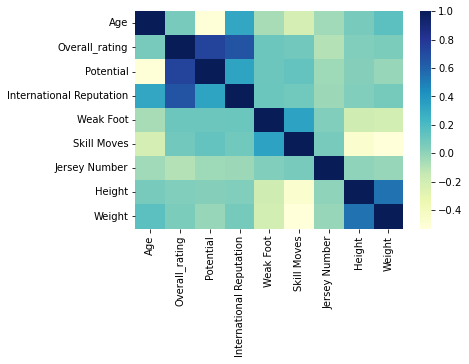

In [21]:
sns.heatmap(fifa.corr(),cmap='YlGnBu')
plt.show()

In [ ]:
# Checking the null values in the data::

In [17]:
fifa.isnull().sum()
# As we can see In the club column there is null values 

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [23]:
fifa.loc[fifa.Club.isnull(),:]

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
452,L. Paredes,24,Argentina,80,85,NaN,Right,2,4,4,Medium/ Medium,CM,5,5.083333,165
538,A. Granqvist,33,Sweden,80,80,NaN,Right,2,4,2,High/ Medium,LCB,4,6.333333,185
568,A. Lunev,26,Russia,79,81,NaN,Right,1,3,1,Medium/ Medium,GK,12,6.166667,176
677,I. Smolnikov,29,Russia,79,79,NaN,Right,2,3,3,High/ High,RB,2,5.083333,154
874,A. Dzyuba,29,Russia,78,78,NaN,Right,2,3,3,High/ Medium,ST,22,6.416667,201
953,LuÃ­s Neto,30,Portugal,77,77,NaN,Right,1,3,2,Medium/ Medium,CB,4,6.166667,157
997,D. Kuzyaev,25,Russia,77,80,NaN,Right,1,3,3,Medium/ High,RM,7,6.000000,163
1008,G. Sio,29,Ivory Coast,77,77,NaN,Left,2,3,3,High/ Low,ST,21,5.083333,176
1120,J. Villar,41,Paraguay,77,77,NaN,Right,2,3,1,Medium/ Medium,GK,1,5.083333,187
1271,C. Riveros,35,Paraguay,76,76,NaN,Right,1,3,3,Medium/ Medium,CAM,16,5.083333,163


In [ ]:
# As there is no pattern and indication for the player whose club information is missing.
# So we will fill the values with NOT KNOWN

In [24]:
fifa.loc[fifa.Club.isnull(),'Club']='Not Known'

In [26]:
# Checking the missing values again
fifa.isnull().sum()
# hence the missing values are  treated 

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

# Basic Exploratory Data analysis with Visual Means

In [27]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [29]:
# Dropping the Unnecessary columns from the data::
fifa.drop(columns='Jersey Number',inplace=True)

In [31]:
nums=fifa.select_dtypes(include=np.number).columns

In [32]:
nums

Index(['Age', 'Overall_rating', 'Potential', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Height', 'Weight'],
      dtype='object')

In [33]:
nums=['Age', 'Overall_rating', 'Potential', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Height', 'Weight']

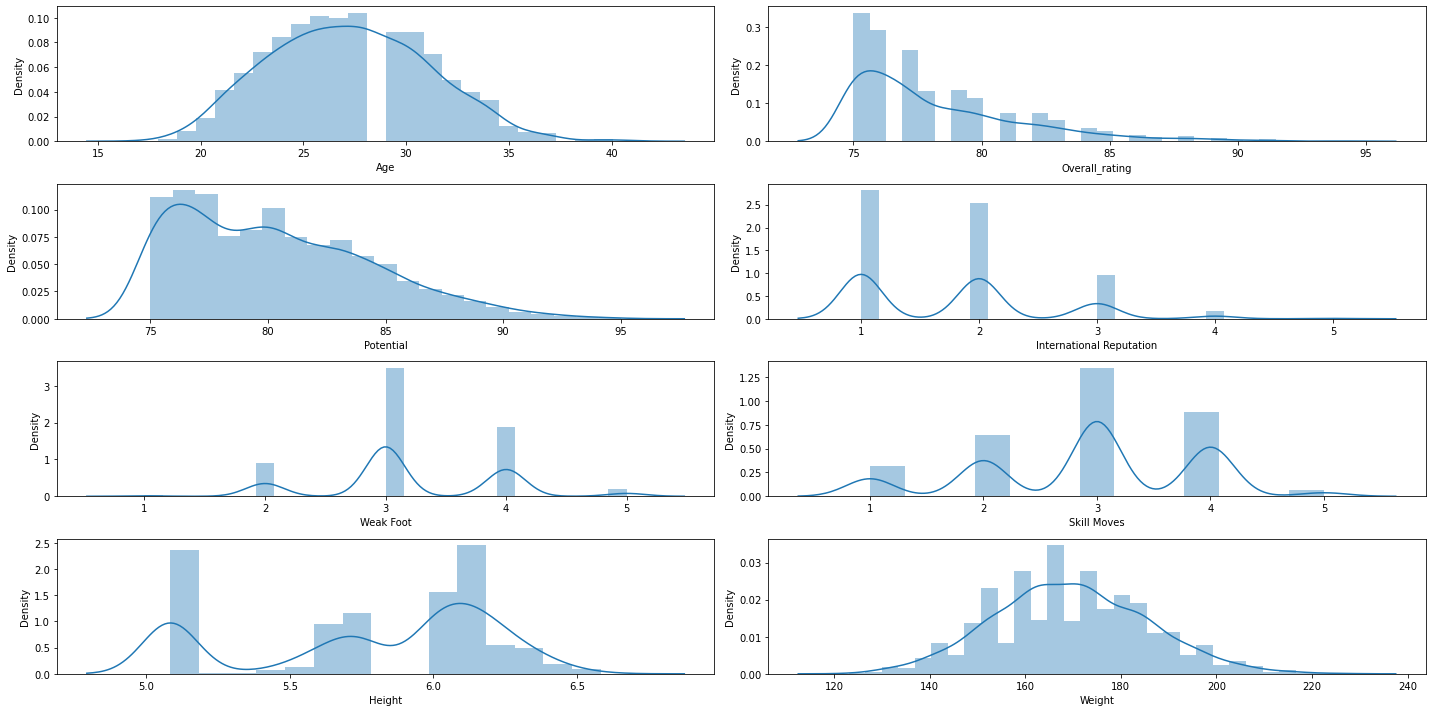

In [35]:
# Plotting the numerical attributes 
rows=4
cols=2
counter=1
plt.rcParams['figure.figsize']=[20,10]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(fifa[i])
    counter+=1
    
plt.tight_layout()
plt.show()

In [36]:
# Fecthing the numerical columns::
fifa.select_dtypes(include=object).drop(columns='Name').columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Position'], dtype='object')

In [37]:
cat=['Preferred Foot', 'Work Rate', 'Position']

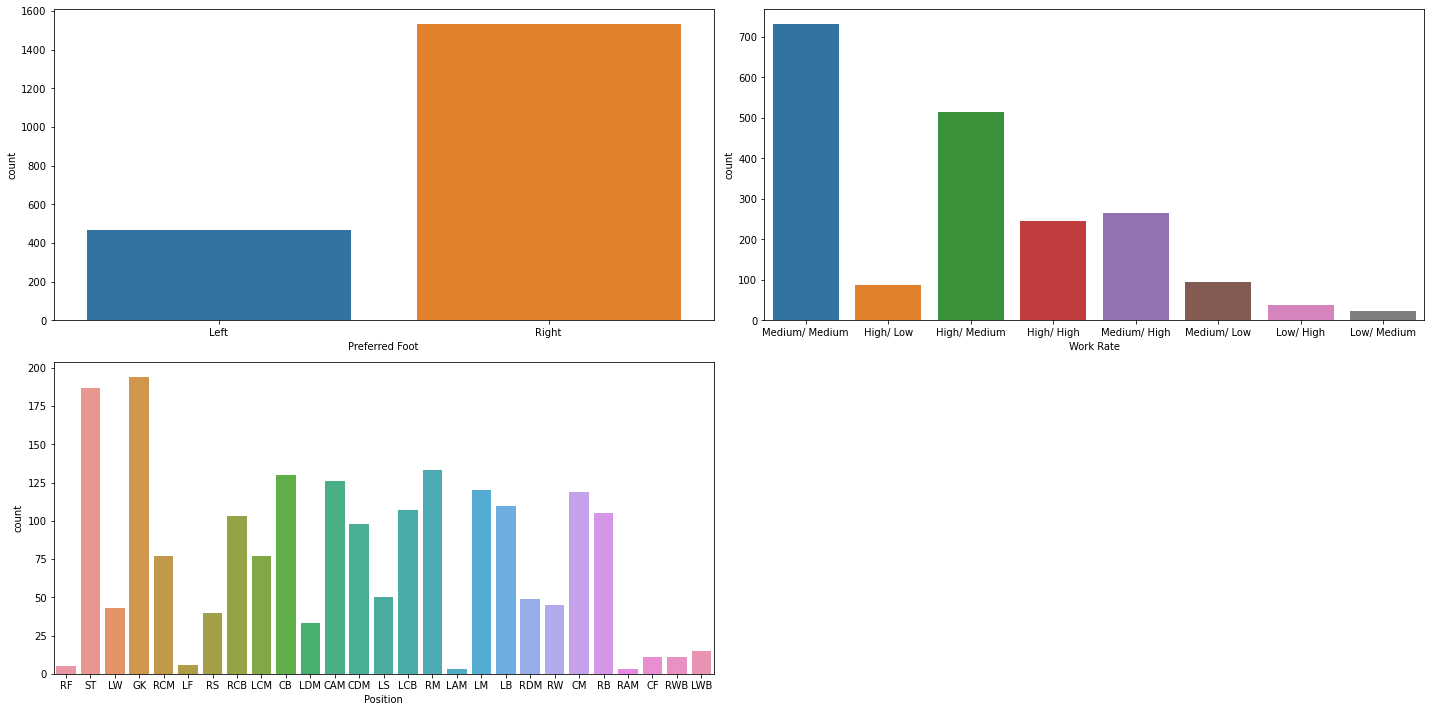

In [41]:
# Plotting the count plots in a loop for categorical attributes
rows=2
cols=2
counter=1
for i in cat:
    plt.subplot(rows,cols,counter)
    sns.countplot(fifa[i])
    plt.xticks()
    counter+=1
    
    
plt.tight_layout()
plt.show()
    

In [42]:
# Now Nationality and Club columns is left as they have a lot of unique values
# we will plot top 15 Nationalities and Top 15 Clubs for the Players

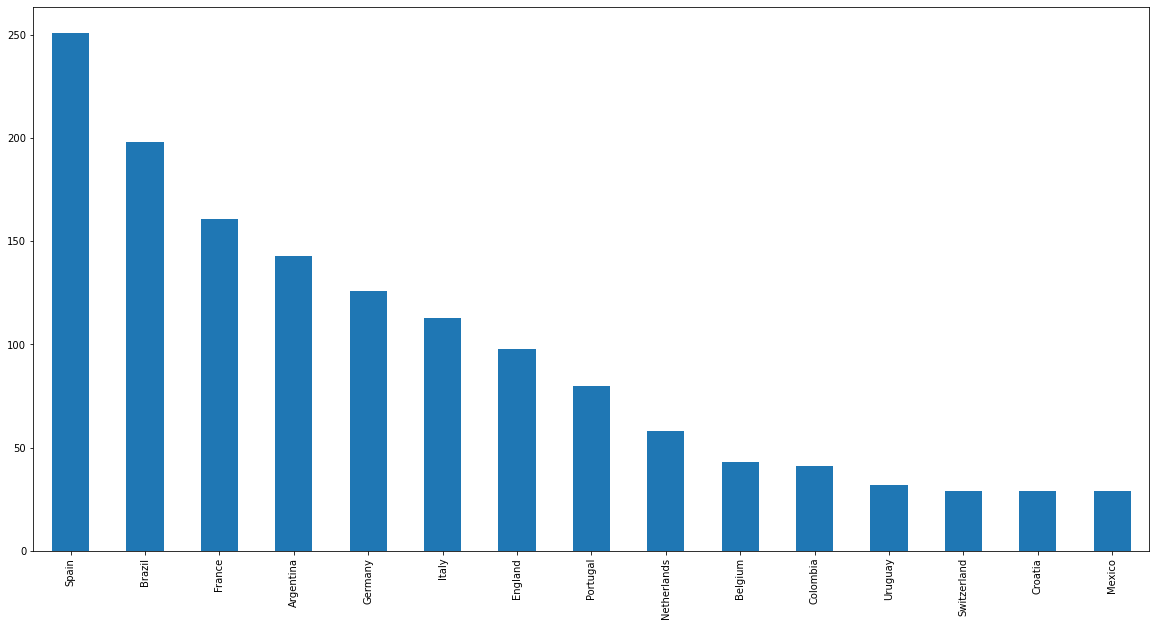

In [45]:
fifa.Nationality.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.show()

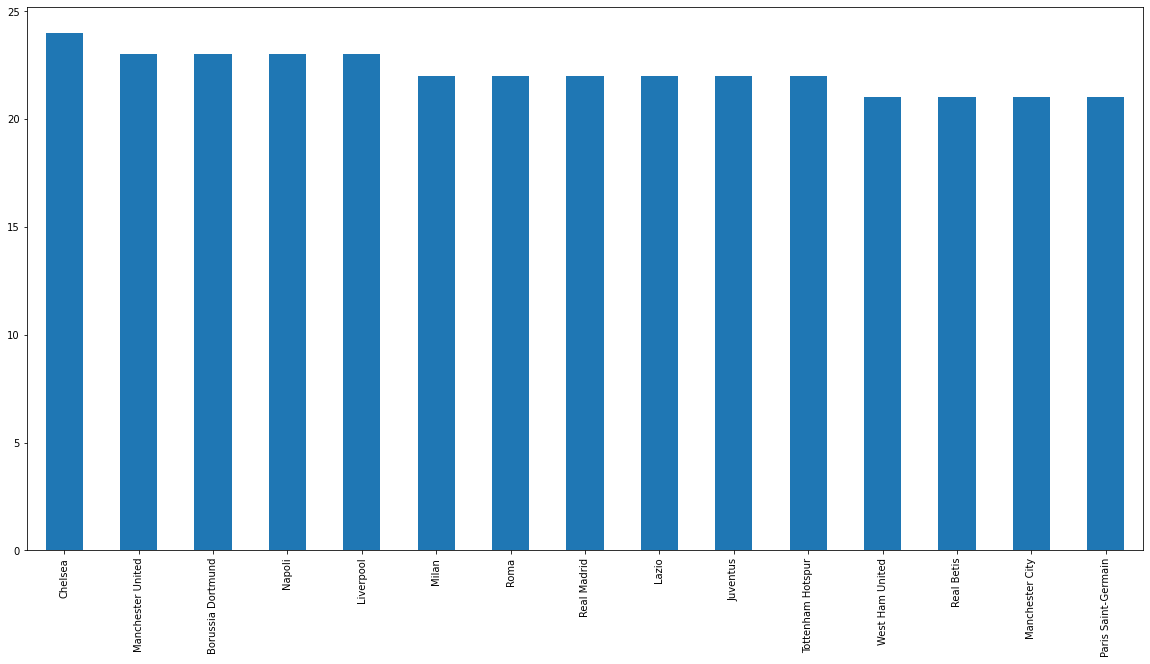

In [46]:
fifa.Club.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.show()

# Statistical Infernces::
* Age Column seems to be normally distributed
* Overall rating seems to be right-skewed
* Potential seems to be right-skewed as well
* Internationtional reputaion seems to be multimodal . It could indicate the column as discrete
* Weak foot and skill moves seem to be multimodal and discrete as well
* Height seems to be multimodal but not discrete
* Weight seems to be normally distributed
* There are more right-footed players than left footed
* Medium/Medium seems to be the most frequent work rate
* GK is the most common position in the data

# Statistical Analysis Testing::

# Q1: a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [48]:
# For This statistical analysis as per Central Limit Theorem 
# we assume data distribution is normal
# Secondly the Variance is also equal 
# we will perform the test on 5% significance level

In [50]:
mew=fifa.Age.mean() # Assumed population mean 


In [54]:
samp1=random.sample(sorted(fifa.Age),200)# Random sample of size 200
n=200 # Size of sample


In [55]:
popsd=fifa.Age.std() # Population Standard deviation

In [56]:
se=popsd/np.sqrt(n) # Standard Error of the sample 


In [58]:
xbar=np.mean(samp1)

In [59]:
sampsd=np.std(samp1)

In [61]:
print('Population Mean:',mew)
print('Sample mean:',xbar)
print('Population Standard Deviation:',popsd)
print('Sample Standard Deviation:', sampsd)
print('Standard Error:',se)

Population Mean: 27.2315
Sample mean: 27.12
Population Standard Deviation: 3.8590612753574423
Sample Standard Deviation: 3.5306656596171777
Standard Error: 0.2728768396819654


# According to the Central Limit Theorem::
* Distribution of sample mean is approximately near to the Population mean.

* As the sample size increases and sample size is greater than 30 is assumed to be normal.

In [62]:
# The estimated standard error of a sample mean tends to decrease with increase in sample size
# This is because as the sample size increases the distribution of the sample becomes closer(or more identical)
# to the distribution of the population
# Hence we observe that the estimated standard error decreases with increase in sample size

# b)Is there any evidence that the players overall rating is greater than 80?

In [63]:
# HO::Average overall rating=80
# HA::Alternative Hypothesis: Average overall rating!=80


In [64]:
stats.ttest_1samp(fifa.Overall_rating,80)

Ttest_1sampResult(statistic=-24.538460498672062, pvalue=1.885376780327322e-116)

In [65]:
# From the above the testing
# As we can see the P value is very small 
# Secondly the Test stats value is in negative and this means that the average is less than 80
# So we Reject the Null Hypothesis 

# c)Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis

In [67]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,5.083333,154


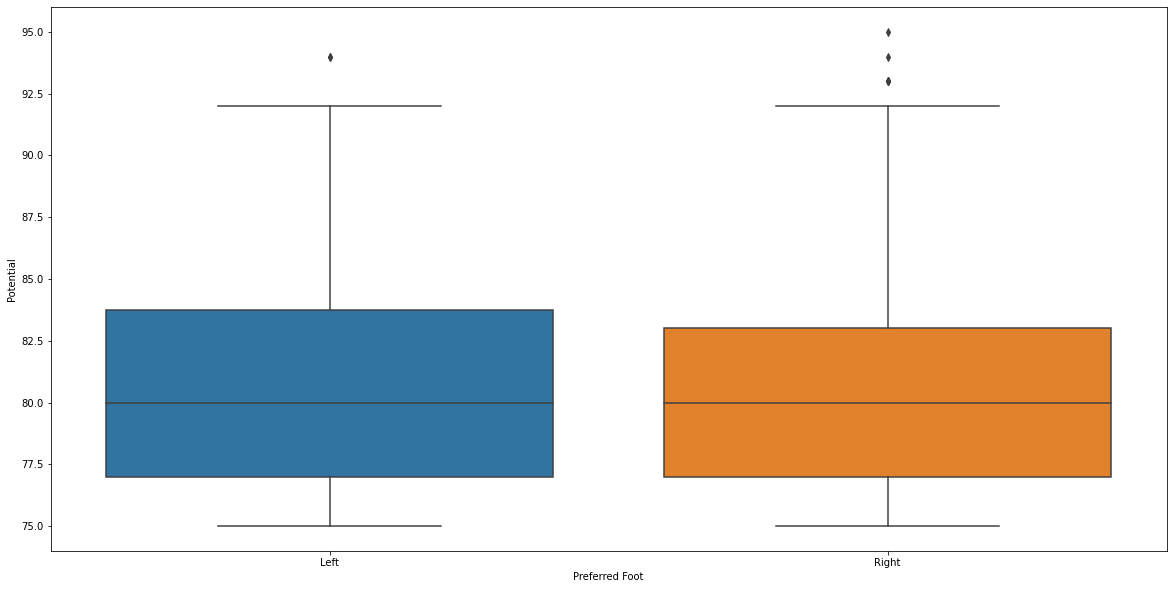

In [68]:
sns.boxplot(x='Preferred Foot',y='Potential',data=fifa)
plt.show()

In [69]:
# From the above Box Plot 
# It seems that the potential of the left foot Playesr is slightly more than the Right foot players.
# To check this we will apply two sample T test

In [70]:
# HO:: Preferred Foot has no Impact on the Potential of the Players
# HA:: Preferred Foot has a impact on the potential of the player

In [71]:
right=fifa.loc[fifa['Preferred Foot']=='Right','Potential']
left=fifa.loc[fifa['Preferred Foot']=='Left','Potential']

In [73]:
stats.ttest_ind(right,left)

Ttest_indResult(statistic=-1.5378037422592814, pvalue=0.12425494914461453)

In [74]:
# Hence we fail to reject the Null Hypothesis
# hence our conclusion is that preferred foot has no impact on the potential of the players

# d)Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [75]:
# HO:: Overall rating has no realtion with the Potential 
# HA:: Overall rating has some relation with Potential

In [140]:
stats.ttest_ind(fifa.Overall_rating,fifa.Potential)

Ttest_indResult(statistic=-17.89175319557915, pvalue=6.241604310936382e-69)

In [77]:
# Inf::
# From above statistical test the  P value is extremly small than our significance level
# Thus we reject the null Hypothesis 
# Hence the Overall rating is  related to the potential of players.


# e)Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis

In [78]:
fifa.head(1)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,5.583333,159


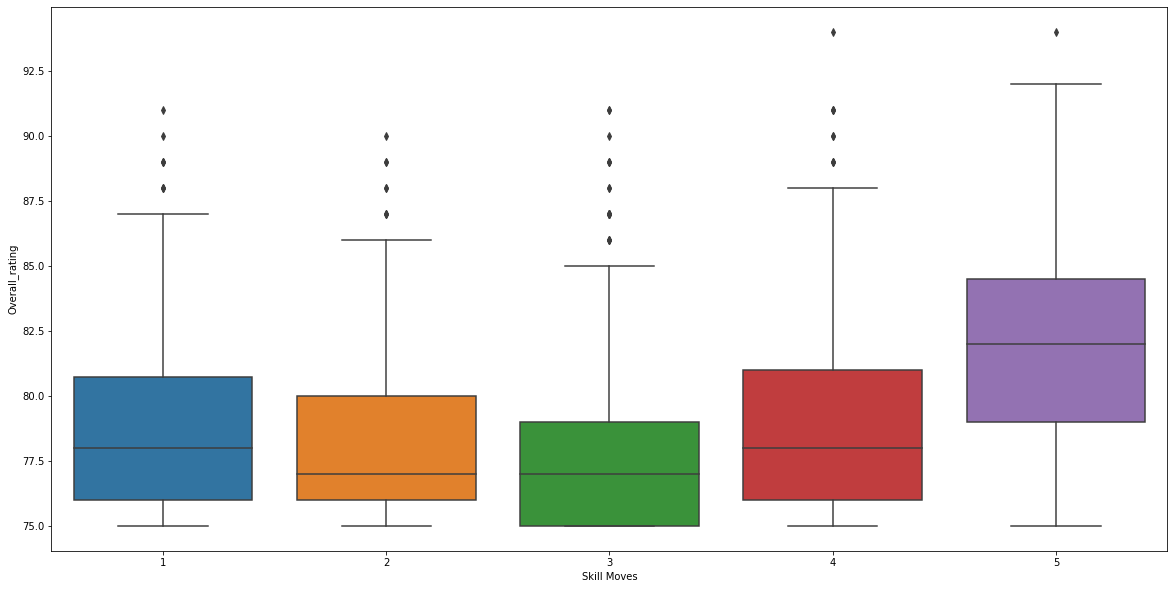

In [79]:
sns.boxplot(x='Skill Moves',y='Overall_rating',data=fifa)
plt.show()

In [80]:
# As we can see from visual means that the player with 5 skill move have highest overall.
# This also indicates the relation with skill and overall rating
# To check our hypothesis we will perform the statistical test

In [ ]:
# HO:: skill moves has no relation with overall rating at all
# HA:: Skill moves has some relation with the overall rating

In [81]:
stats.ttest_ind(fifa['Skill Moves'],fifa.Overall_rating)

Ttest_indResult(statistic=-983.0720466249821, pvalue=0.0)

In [82]:
# Hence the P value is zero and test stats is in negative 
# Thus we will reject the HO 
# therefore from test  it is cleared that skill has some relation with overall rating 

# Mobile Network Dataset :
* The given data set contains information about the internet, calls, and messages of various network.

In [83]:
mobile=pd.read_csv('phone.csv')

In [84]:
# First 5 rows
mobile.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [85]:
# Info
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [86]:
# Summary statistics 
mobile.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [87]:
# shape of Data
mobile.shape

(820, 6)

In [88]:
# Checking null values in the data ::
mobile.isnull().sum()
# As there is no missing values in the data 

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

# Basic Exploratory Data Analysis

In [90]:
# As we have check the Info of the data 
# There is only one numerical column in the data that is Duration 
# So we will check the distribution of the data 

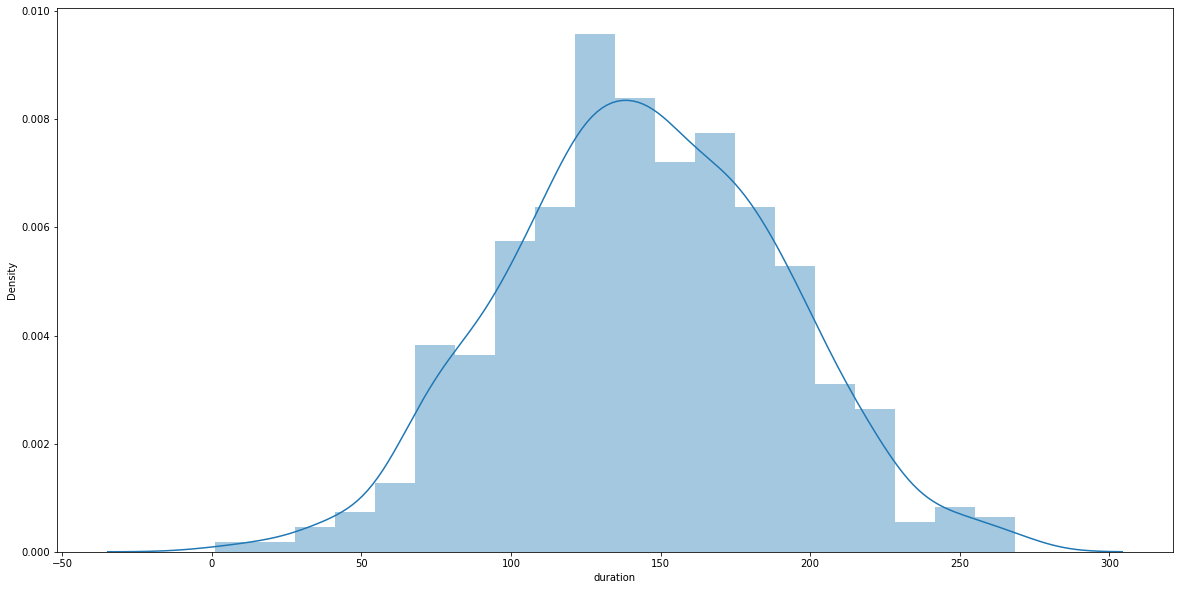

In [91]:
sns.distplot(mobile.duration)
plt.show()

In [92]:
# Fetching the categorical columns 

In [94]:
cat=mobile.select_dtypes(include=object).columns

In [95]:
cat

Index(['date', 'item', 'month', 'network', 'network_type'], dtype='object')

In [97]:
cats=['item', 'month', 'network', 'network_type'] # Fetching usefull categorical columns

In [98]:
 # making multiple count plots using loop 

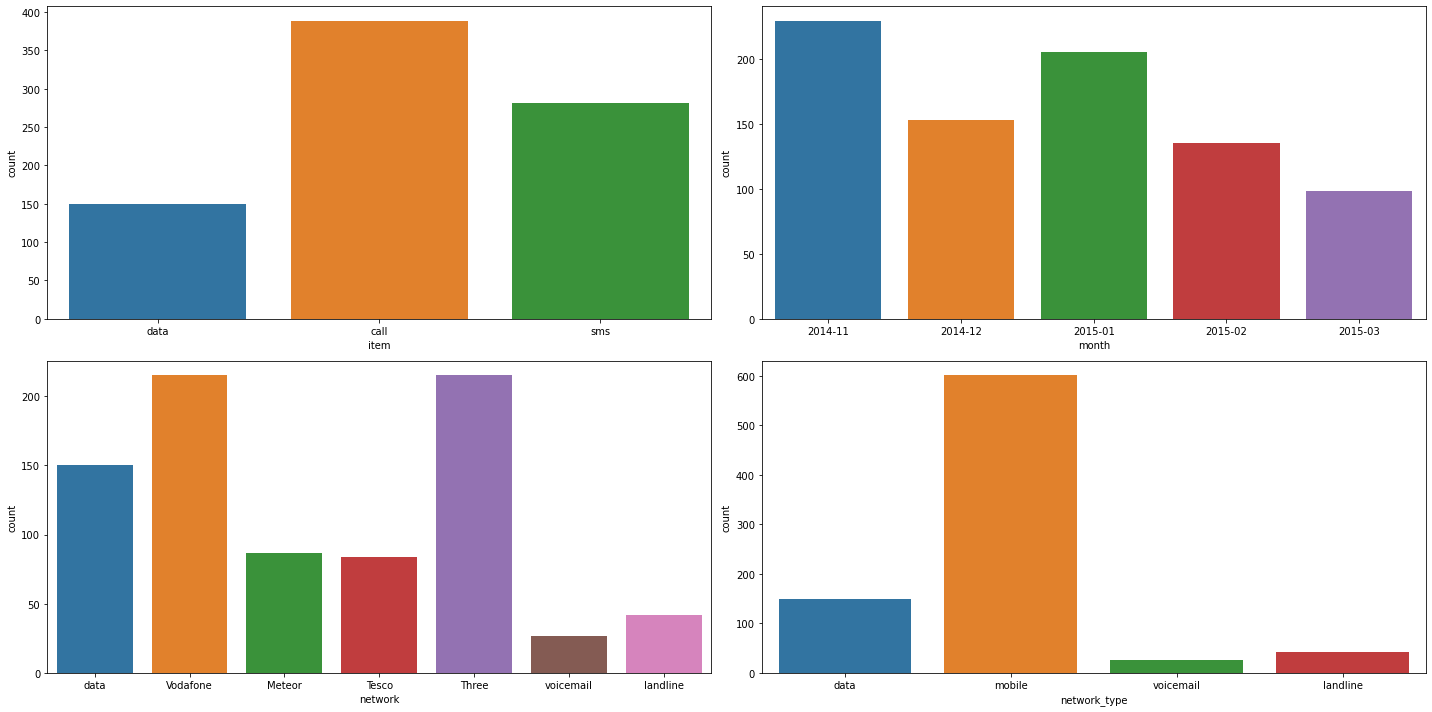

In [99]:
rows=2
cols=2
counter=1
for i in cats:
    plt.subplot(rows,cols,counter)
    sns.countplot(mobile[i])
    plt.xticks()
    counter+=1
    
plt.tight_layout()
plt.show()

# Infrence ::
* The duration column seems to be normally distributed
* The usage of calls are maximum as compared to the sms and internet
* November 2014 is busiest time  according to the data 
* Vodafone leads in the count of usage 
* Usage of mobile is substantially more compared to data ,voicemail and landline 

# Statistical Analysis

# a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results

In [103]:
# For 95 % Confidence Interval
cl=0.95 # confidence level
alpha=1-cl # Significance level 
xbar=mobile.duration.mean() # Sample mean 
n=len(mobile.duration)  # Sample size 
s=np.std(mobile.duration) # sample standard deviation
t_crit=stats.t.isf(alpha/2,n-1)
se=s/np.sqrt(n) # Standard Error

In [105]:
ci_95=stats.norm.interval(0.95,xbar,se) # confidence interval for 95 % confidence level

In [109]:
print('confidence Interval at 95 % is ',ci_95)

confidence Interval at 95 % is  (141.1797470762666, 147.4301240434043)


In [107]:
# For 99 % confidence Level :

In [108]:
ci_99=stats.norm.interval(0.99,xbar,se)

In [110]:
print('confidence Interval at 99% is ',ci_99)

confidence Interval at 99% is  (140.1977416835259, 148.41212943614502)


In [111]:
# As we can clearly see, the confidence interval for 99% confidence level is wider than the confidence interval for 95%
# This means that as the confidence level increases, our confidence interval increases

# c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph

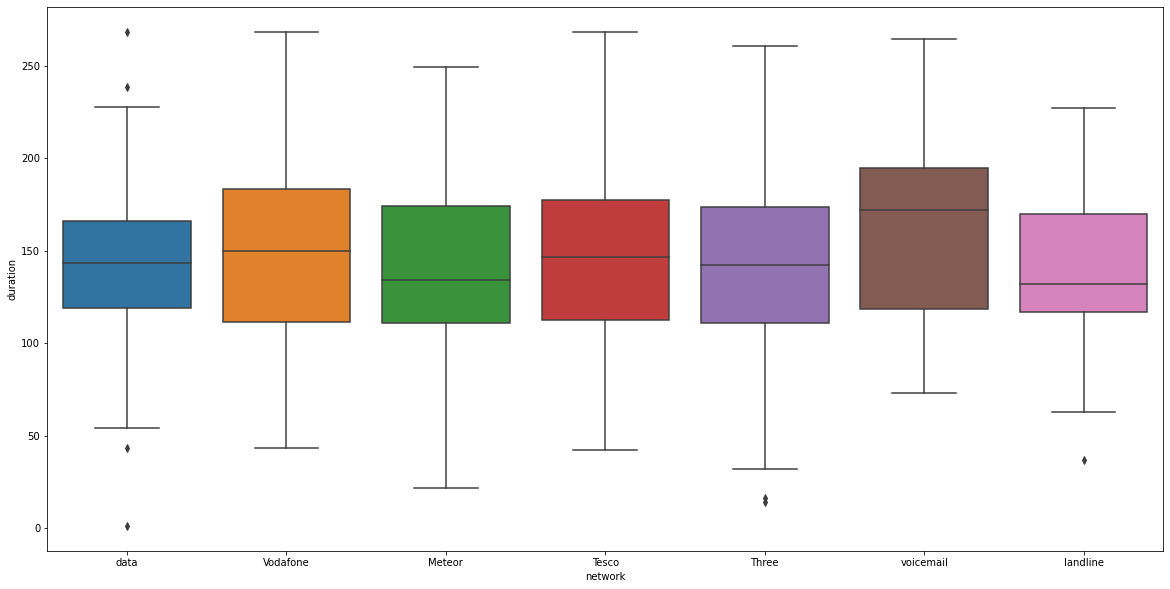

In [113]:
sns.boxplot(x='network',y='duration',data=mobile)
plt.show()

# d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [114]:
mobile.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [115]:
# Grouping the duration columns with respect to Item 

In [116]:
mobile.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [118]:
data=mobile.loc[mobile.item=='data','duration']
call=mobile.loc[mobile.item=='call','duration']
sms=mobile.loc[mobile.item=='sms','duration']

In [119]:
# First we will perform the Normality test that is Shapiro Wilk test:


In [120]:
stats.shapiro(data),stats.shapiro(call),stats.shapiro(sms)

(ShapiroResult(statistic=0.9912641048431396, pvalue=0.4852308928966522),
 ShapiroResult(statistic=0.9973040819168091, pvalue=0.7803040742874146),
 ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526))

In [121]:
# As we can see the P value is much greater than significance level.
# Hence as it is clearly visible that the data is normally distributed 


In [122]:
# Now we will perform the variance test that is Levene test


In [123]:
stats.levene(data,call,sms)

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)

In [124]:
# As it is clearly visible that the P value is less than significance level
# Hence we cannot perform any parametric test here because second condition is not met 
# Thus we have to perform the Kruskal-wallis test 


In [125]:
# HO:: Item has no impact on the duration 
# HA:: Item has some impact on the duration 

In [127]:
stats.kruskal(data,call,sms)

KruskalResult(statistic=3.5659414348706377, pvalue=0.16813791437741693)

In [128]:
# As per the test results the P value is greater than the significance level.
# Therefore we fail to reject the null hypothesis 
# Hence there is no relation between Item and duration 

# e) Perform statistical tests to identify the relation between network and network_type.

In [129]:
mobile

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [130]:
# As both the columns are categorical so we will perform Chisq test
# for that we need to make the contingency table 

In [131]:
# Ho: network and network_type has no relation in between 
# HA: network and network type has some realtion in between 


In [132]:
tbl=pd.crosstab(mobile.network,mobile.network_type)

In [133]:
test_statistics,pvalue,dof,exp=stats.chi2_contingency(tbl)

In [134]:
print(test_statistics,pvalue)

2460.0 0.0


In [135]:
# As we can see the P value is 0 
# Therfore we have rejected our null hypothesis 
# we conclude that tnetwork and network type has some relation

# THE END